## Business case :
### Create a predictive model which will help the customers to predict future flight prices and plan their journey accordingly.

In [1]:
# importing required Labraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel('Flight_Fare.xlsx')
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## Domain Analysis

# Basic Check

In [3]:
# chech the first five rows
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
# check the all rows and columns counts.
data.shape

(10683, 11)

In [5]:
# check the all columns with datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
# check the statistic mathmatic information as mean,average,max and min etc.
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
# check the statastic mathematic information of objects columns
data.describe(include=['O'])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


# Exploratory Data Analysis

## Univariate Analysis

## Airline

<AxesSubplot:xlabel='Airline', ylabel='count'>

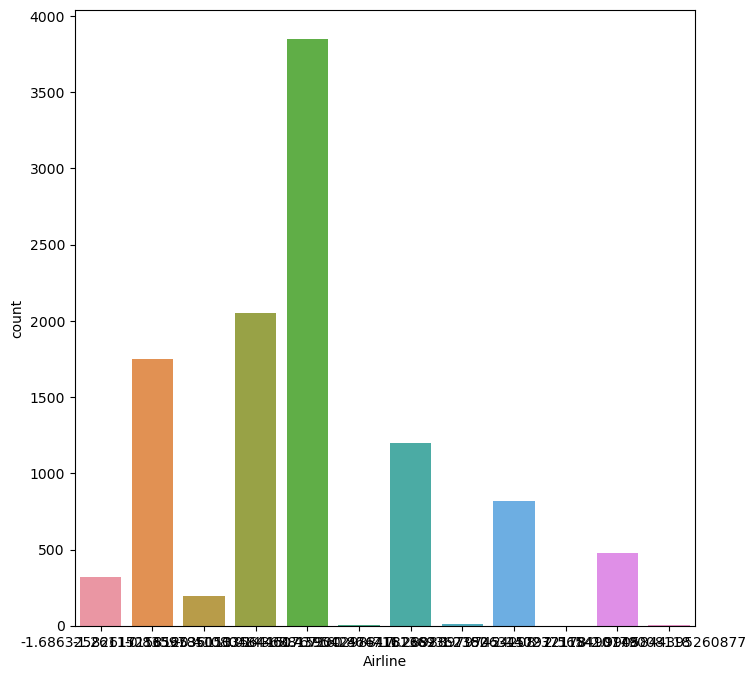

In [145]:
# Airline Analysis 
plt.figure(figsize=(8,8))
sns.countplot(x='Airline',data=data)

### The Columns Date_of_Journey,Dep_Time and Arrival_Time is Object and we need to convert into date and time

In [9]:
# The Columns Date_of_Journey,Dep_Time and Arrival_Time is Object and we need to convert into date and time.
def convert_into_datetime(columns):
    data[columns]=pd.to_datetime(data[columns]) # Convert columns in pandas dataframe to the datetime datatype using the pd.to_datetime

In [10]:
# Converting the columns into Datetime using for loop
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:  
    convert_into_datetime(i)        

# Date_of_Journey

In [11]:
data['Journey_Day']=data['Date_of_Journey'].dt.day     # Extracts the day from Date_of_Journey using dt.day and assing in new column Journey_Day.
data['Journey_Month']=data['Date_of_Journey'].dt.month  # Extracts the Month from Date_of_Journey using dt.day and assing in new column Journey_Month.

In [12]:
# Drop the Date_of_Journey
data.drop('Date_of_Journey',axis=1,inplace=True)  # Extract the new columns journey_day and journey_month from Date_of_Journey so that's why drop this column

<AxesSubplot:xlabel='Journey_Month', ylabel='count'>

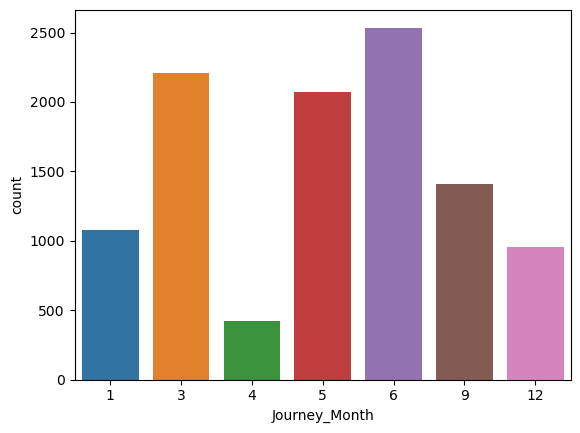

In [13]:
#Analysis Journey months columns which months have passengers traveled more.
sns.countplot(x='Journey_Month',data=data)

# Dep_Time

In [14]:
# Converting the Dep_time into Dep_time_hour and Dep_time_min
data['Dep_time_hour']=data['Dep_Time'].dt.hour  # Extract the hour from Dep_Time using dt.hour and assing in the new column Dep_time_hour
data['Dep_time_min']=data['Dep_Time'].dt.minute  # Extract the min from Dep_time using dt.min and assing in new column Dep_time_min.

In [15]:
# Drop the Dep_time Colunms
data.drop('Dep_Time',axis=1,inplace=True) # Extract the new columns Dep_time_hour and Dep_time_min so that's why removing the Dep_time column.

<AxesSubplot:xlabel='Dep_time_hour', ylabel='Count'>

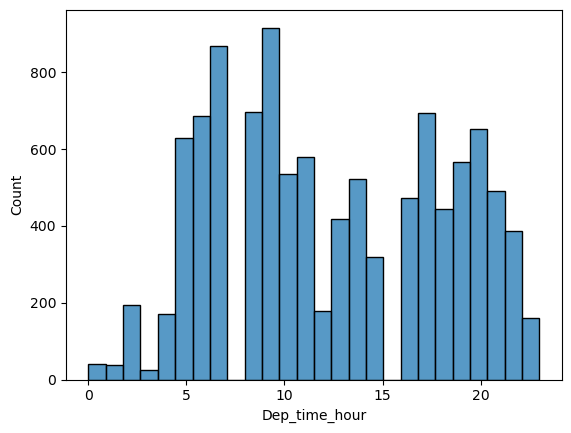

In [16]:
#Analysis Dep_Time_hour
sns.histplot(x='Dep_time_hour',data=data)

# Arrival_Time

In [17]:
#Converting the Arrival_Time into Arrival_Time_hour and Arrival_Time_min
data['Arrival_Time_hour']=data['Arrival_Time'].dt.hour  ## Extract the hour from Arrival_Time using dt.hour and assing in the new column Arrival_Time_hour.
data['Arrival_Time_min']=data['Arrival_Time'].dt.minute  # Extract the hour from Arrival_Time using dt.min and assing in the new column Arrival_Time_min.

In [18]:
# Drop The Arrival_Time columns
data.drop('Arrival_Time',axis=1,inplace=True)  # Extract the new columns Arrival_Time_hour and Arrival_Time_min so that's why removing the Arrival_Time column.

<AxesSubplot:xlabel='Arrival_Time_hour', ylabel='count'>

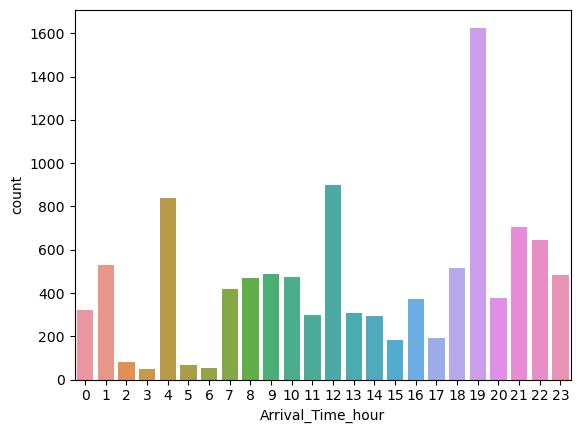

In [19]:
# Analysis the Arrival_Time_hour
sns.countplot(x='Arrival_Time_hour',data=data)

# Duration

In [20]:
# using the for loop in Duration where we need to split the hour and minute.
duration=list(data['Duration'])  #Create the list duration and contain the value from Duration
for i in range(len(duration)):  # loop will run over each element inthe duration list
    if len(duration[i].split(' '))==2:  # if the value at index i can be split using space('') into two part.
        pass                            # Above condition is true continue.
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]  # Add 0 hour when only minute is present.

In [21]:
data['Duration']=duration    # Duration columns is equal to duration list

In [22]:
# Define the hour function
def hour(x):
    return x.split(' ')[0][0:-1] # get the hour value using the slicing
## Define the min function
def minutes(x):
    return x.split(' ')[1][0:-1]  #get the min value using the slicing

In [23]:
data['dur_hour']=data['Duration'].apply(hour)  # creating the new columns dur_hour

In [24]:
data['dur_min']=data['Duration'].apply(minutes)  # creating the new columns dur_min

In [25]:
# drop the Duration Columns
data.drop('Duration',axis=1,inplace=True)

In [26]:
data['dur_hour'] = data['dur_hour'].astype(int)
data['dur_min'] = data['dur_min'].astype(int)

<AxesSubplot:xlabel='dur_hour', ylabel='Count'>

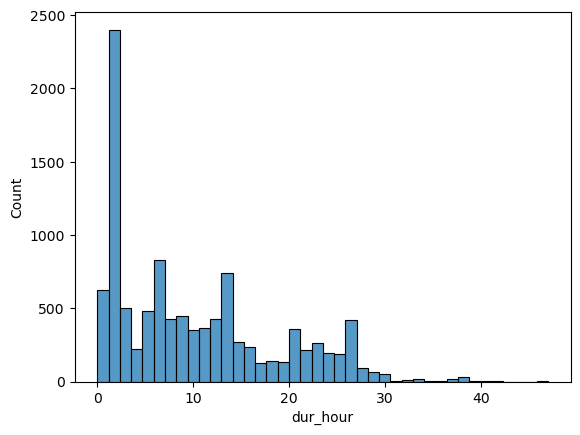

In [27]:
# Analysis the dur_hour
sns.histplot(x='dur_hour',data=data)

## Source

<AxesSubplot:xlabel='Source', ylabel='count'>

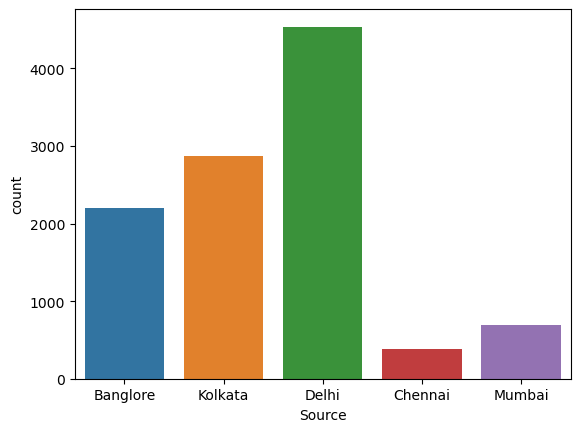

In [28]:
# Anlaysis Source
sns.countplot(x='Source',data=data)

## Destination

<AxesSubplot:xlabel='Destination', ylabel='count'>

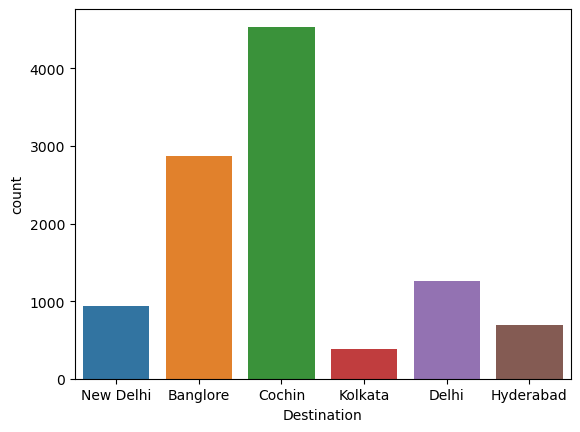

In [29]:
# Analysis Desitination
sns.countplot(x='Destination',data=data)

## Route

<AxesSubplot:xlabel='Route', ylabel='count'>

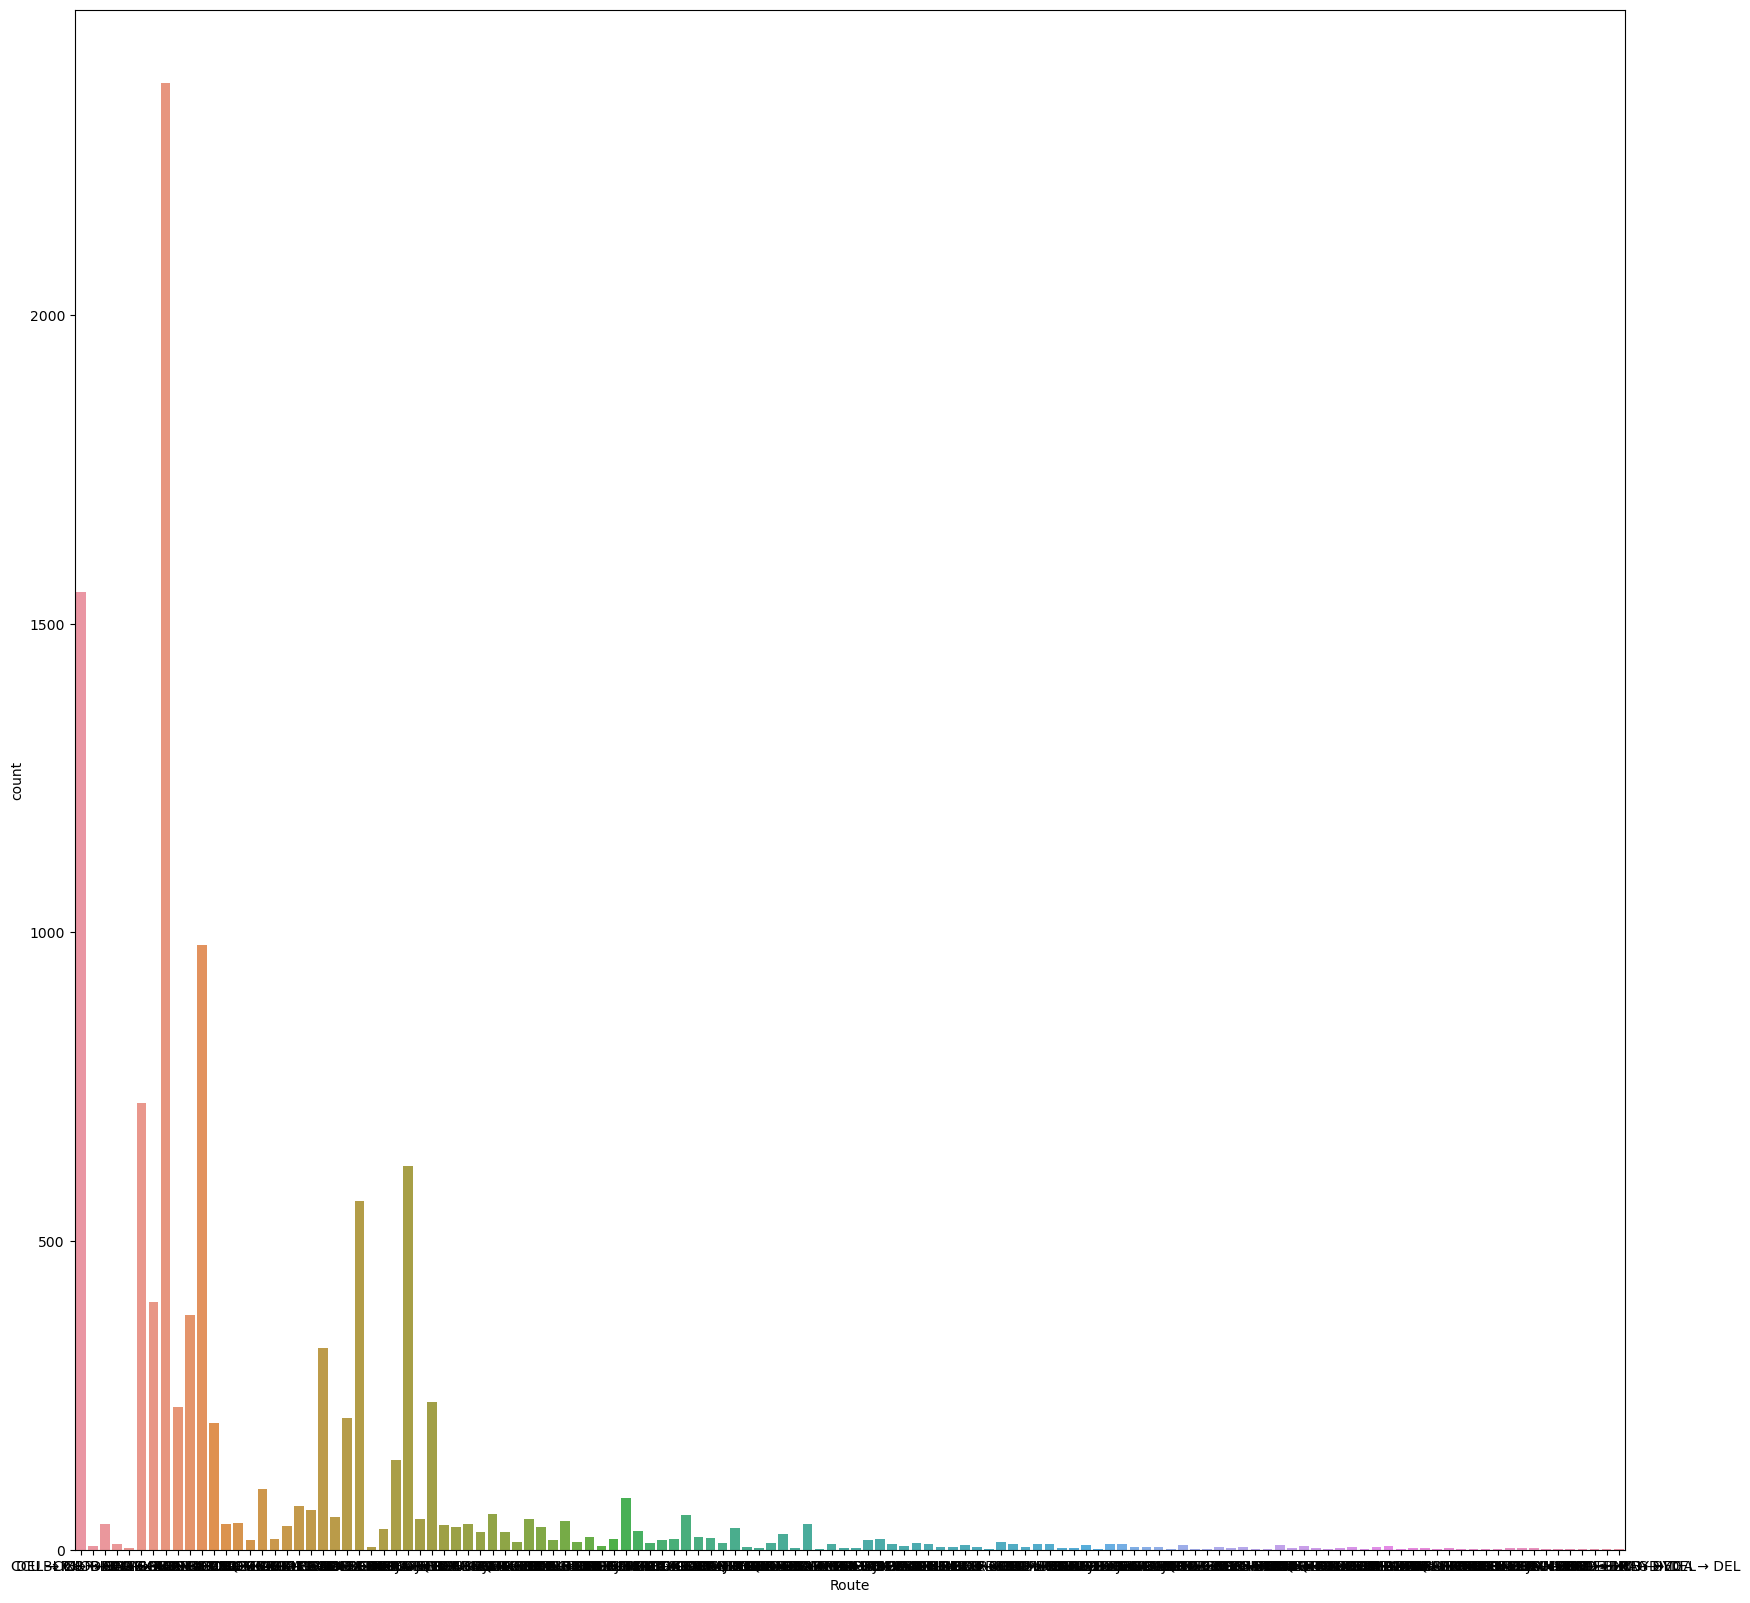

In [30]:
# Analysis Route
plt.figure(figsize=(20,20))
sns.countplot(x='Route',data=data)

In [31]:
# check the Route categories with counts
data.Route.value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

## Total Stops

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

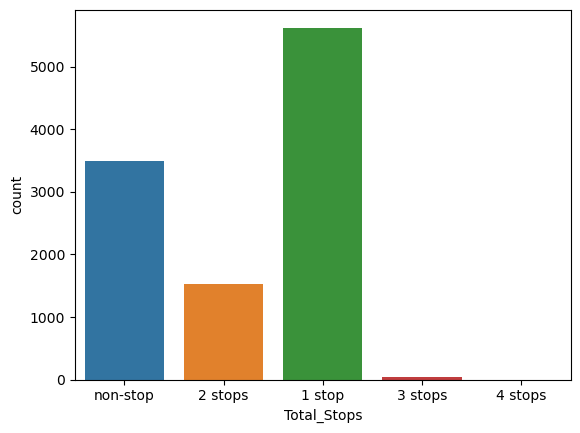

In [32]:
# Anslysis Total stops
sns.countplot(x='Total_Stops',data=data)

## Additional_Info

<AxesSubplot:xlabel='Additional_Info', ylabel='count'>

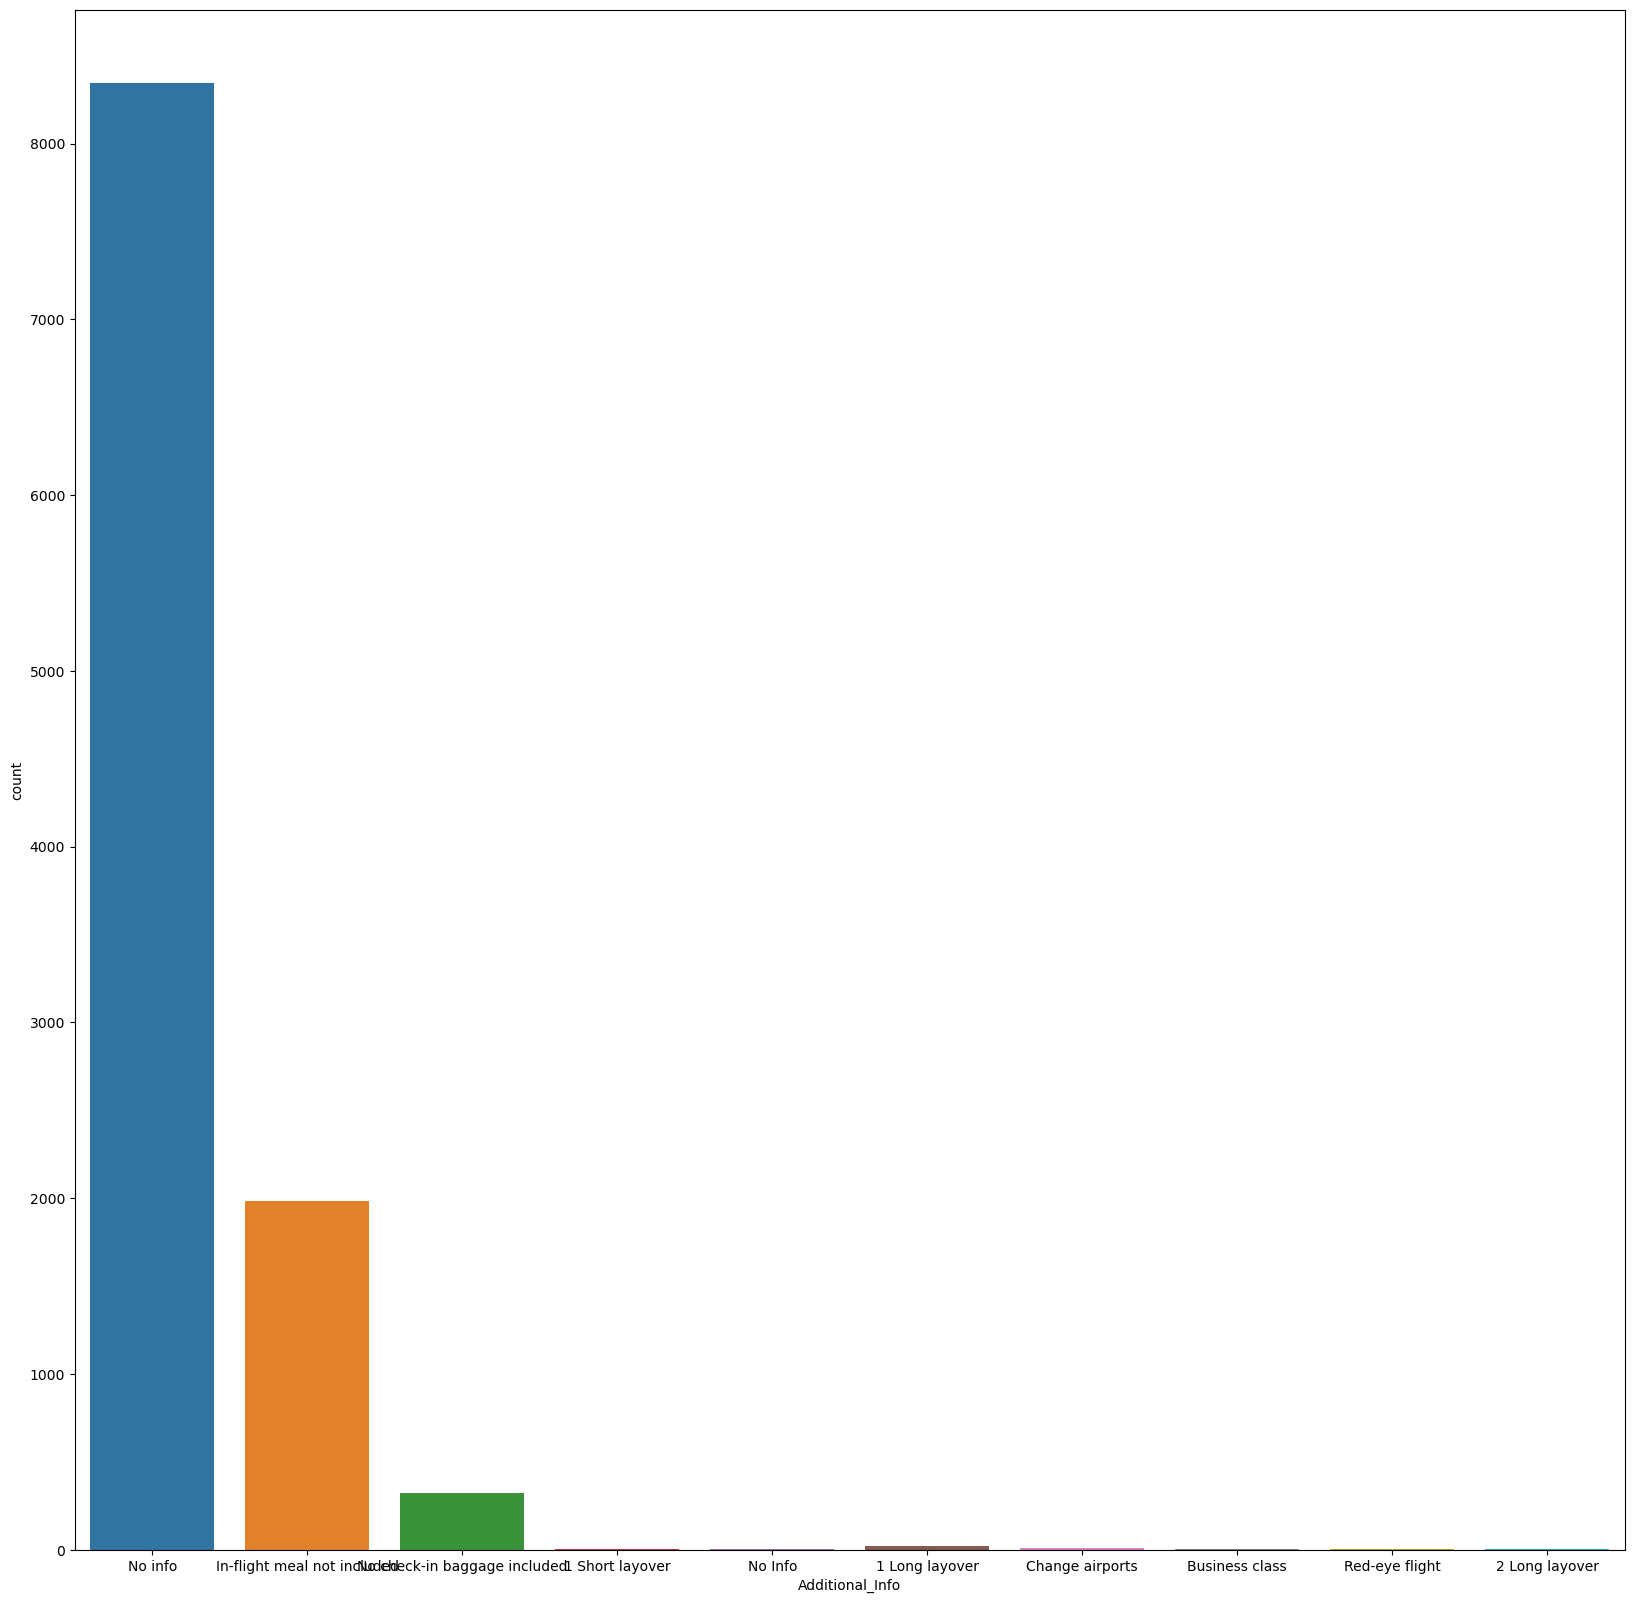

In [33]:
# Analysis Additional_Info
plt.figure(figsize=(20,20))
sns.countplot(x='Additional_Info',data=data)

## Price

<AxesSubplot:xlabel='Price', ylabel='Count'>

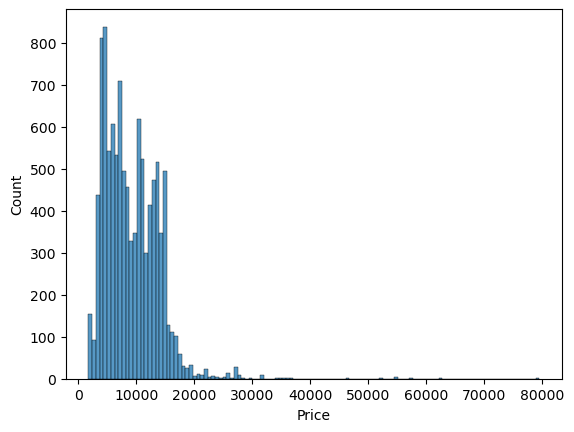

In [34]:
# Analysis the Price
sns.histplot(x='Price',data=data)

In [35]:
data.Price.value_counts()  # Check the price value counts

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
14153      1
8488       1
7826       1
6315       1
12648      1
Name: Price, Length: 1870, dtype: int64

# Bivariate Analysis

<AxesSubplot:xlabel='Airline', ylabel='Price'>

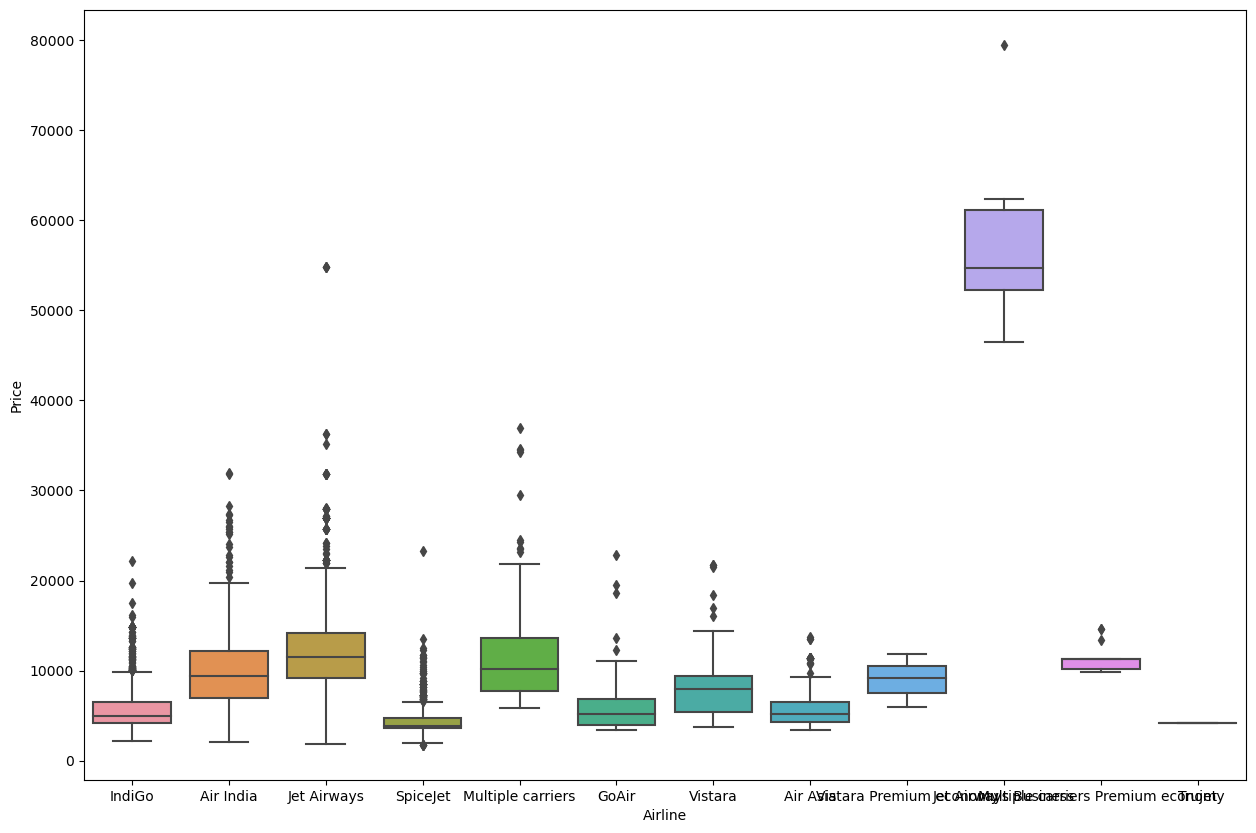

In [36]:
# Analyzing the relationship between airline and month with target variable
plt.figure(figsize=(15,10))
sns.boxplot(x='Airline',y='Price',data=data)

<AxesSubplot:xlabel='Journey_Month', ylabel='Price'>

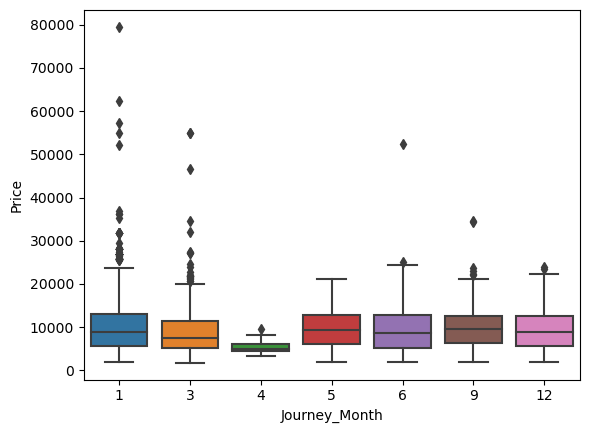

In [37]:
# Analyzing the relationship between Month and Price
sns.boxplot(x='Journey_Month',y='Price',data=data)

<AxesSubplot:xlabel='Source', ylabel='Price'>

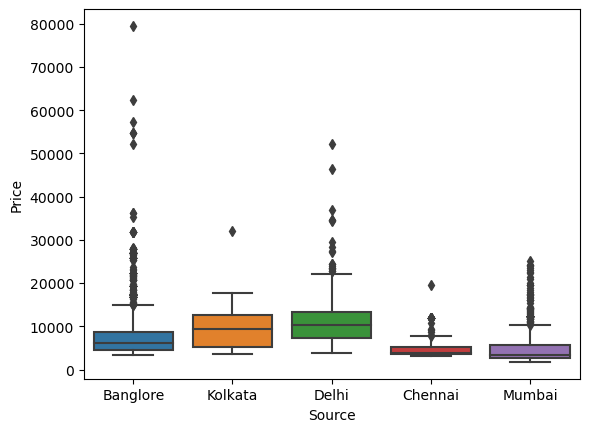

In [38]:
# Analysis relationship between Source and price
sns.boxplot(x='Source',y='Price',data=data)

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

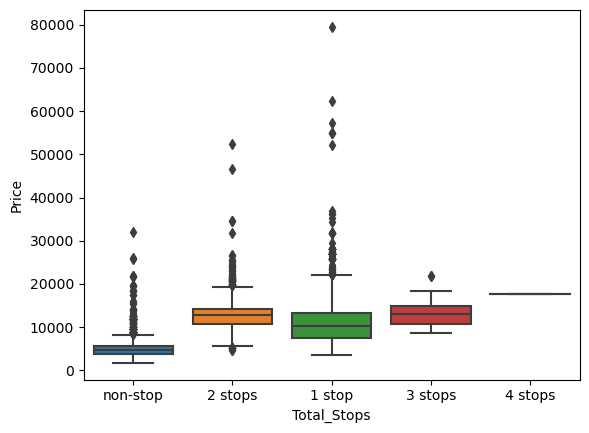

In [39]:
# Analysis the relationship between Total_Stops  and price
sns.boxplot(x='Total_Stops',y='Price',data=data)

<AxesSubplot:xlabel='Additional_Info', ylabel='Price'>

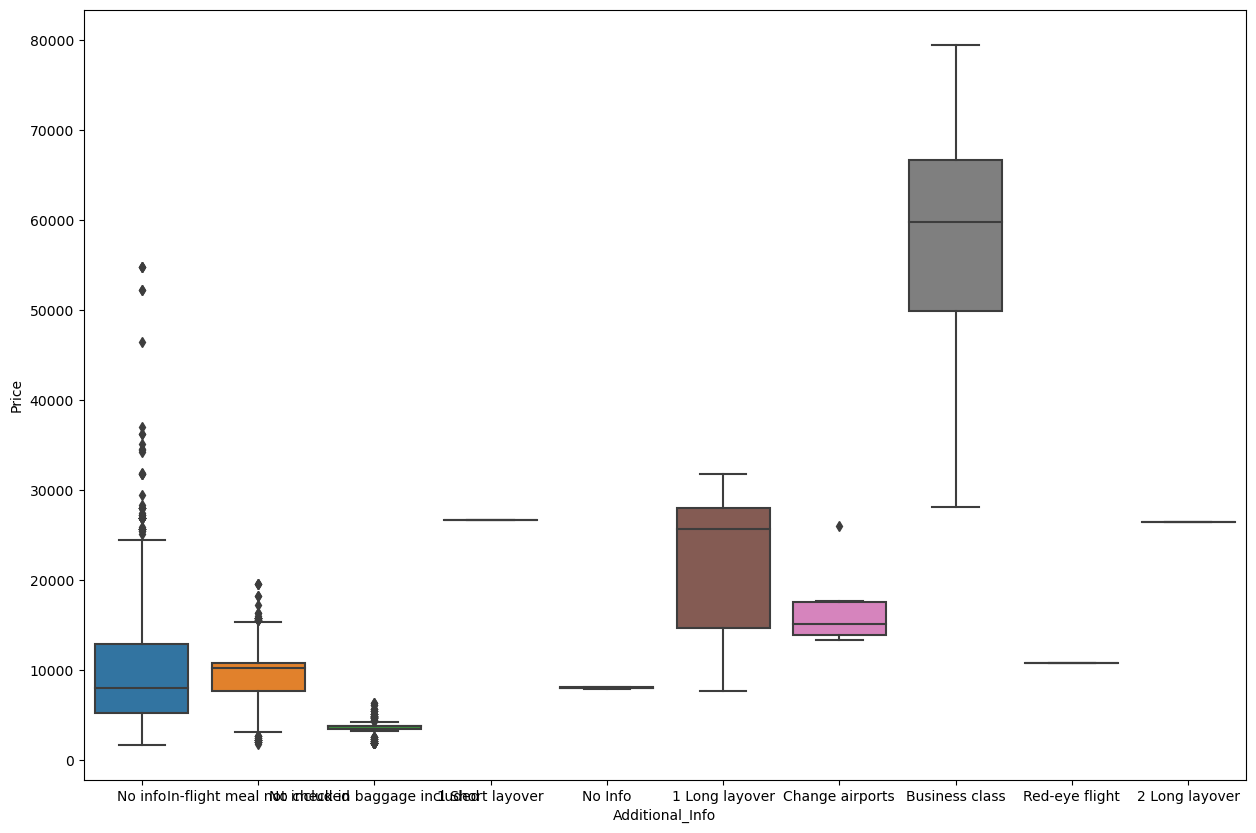

In [40]:
# Analysis the relationship between Additional_Info and price
plt.figure(figsize=(15,10))
sns.boxplot(x='Additional_Info',y='Price',data=data)

# Data preprocessing and Feature engineering

In [41]:
# check the null value
data.isnull().sum()   
# one missing value present in route
# one missing value present in total stops

Airline              0
Source               0
Destination          0
Route                1
Total_Stops          1
Additional_Info      0
Price                0
Journey_Day          0
Journey_Month        0
Dep_time_hour        0
Dep_time_min         0
Arrival_Time_hour    0
Arrival_Time_min     0
dur_hour             0
dur_min              0
dtype: int64

In [42]:
data.loc[data['Route'].isnull()]  ##check the null value row location using Loc function.

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_time_hour,Dep_time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
9039,Air India,Delhi,Cochin,NaN,NaN,No info,7480,5,6,9,45,9,25,23,40


In [43]:
#Drop the null value row
data.drop(9039,axis=0,inplace=True)   # there is one null value present in row 

In [44]:
data.isnull().sum()      # No null value present

Airline              0
Source               0
Destination          0
Route                0
Total_Stops          0
Additional_Info      0
Price                0
Journey_Day          0
Journey_Month        0
Dep_time_hour        0
Dep_time_min         0
Arrival_Time_hour    0
Arrival_Time_min     0
dur_hour             0
dur_min              0
dtype: int64

## Drop The Unwanted Feature

In [45]:
# Route and Total stops Feature are giving the same information so we can drop the one feature.
# drop the route Columns
data.drop('Route',axis=1,inplace=True)

## Convert Categorical data into numerical Usuing labelEncoding

In [46]:
# labelEncoding technique is used to transform categorical feature into numerical values.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()     

In [47]:
data.Airline=le.fit_transform(data.Airline)  # transform categorical data into numerical

In [48]:
data.Source=le.fit_transform(data.Source)   #transform categorical data into numerical

In [49]:
data.Destination=le.fit_transform(data.Destination)  #transform categorical data into numerical

In [50]:
data.Total_Stops=le.fit_transform(data.Total_Stops)    #transform categorical data into numerical

In [51]:
data.Additional_Info=le.fit_transform(data.Additional_Info)  #transform categorical data into numerical

## Scalling the dataset

In [52]:
# Scalling the dataset Using StandardScaler ,where the values range will be 3 to -3 between.
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
# Transformation the data
data[['Airline','Source','Destination','Total_Stops','Additional_Info','dur_hour','dur_min','Journey_Day','Journey_Month','Dep_time_hour','Dep_time_min','Arrival_Time_hour','Arrival_Time_min']]=scale.fit_transform(data[['Airline','Source','Destination','Total_Stops','Additional_Info','dur_hour','dur_min','Journey_Day','Journey_Month','Dep_time_hour','Dep_time_min','Arrival_Time_hour','Arrival_Time_min']])

In [53]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_time_hour,Dep_time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,-0.410805,-1.658359,2.416534,1.407210,0.499921,3897,1.285536,-0.848450,1.654154,-0.234950,-1.800436,-0.890014,-0.970614,1.279041
1,-1.261152,0.890014,-0.973812,-0.253703,0.499921,7662,-0.872724,-1.517909,-1.303113,1.363607,-0.050909,-0.587094,-0.381999,-0.196319
2,0.014369,0.040556,-0.295743,-0.253703,0.499921,13882,-0.759131,1.159928,-0.607286,0.031476,-1.363054,0.018745,1.030677,-1.671678
3,-0.410805,0.890014,-0.973812,-0.807341,0.499921,6218,-0.872724,2.164117,0.958326,-1.034229,1.407030,0.321664,-0.617445,-0.196319
4,-0.410805,-1.658359,2.416534,-0.807341,0.499921,13302,-1.099909,-1.517909,0.610412,1.363607,1.115442,0.624584,-0.735168,0.983969


## feature Selection

In [54]:
# create the new data frame
data1=data[['Airline','Source','Destination','Total_Stops','Additional_Info','dur_hour','dur_min','Journey_Day','Journey_Month','Dep_time_hour','Dep_time_min','Arrival_Time_hour','Arrival_Time_min']]
data1

,Airline,Source,Destination,Total_Stops,Additional_Info,dur_hour,dur_min,Journey_Day,Journey_Month,Dep_time_hour,Dep_time_min,Arrival_Time_hour,Arrival_Time_min
0,-0.410805,-1.658359,2.416534,1.407210,0.499921,-0.970614,1.279041,1.285536,-0.848450,1.654154,-0.234950,-1.800436,-0.890014
1,-1.261152,0.890014,-0.973812,-0.253703,0.499921,-0.381999,-0.196319,-0.872724,-1.517909,-1.303113,1.363607,-0.050909,-0.587094
2,0.014369,0.040556,-0.295743,-0.253703,0.499921,1.030677,-1.671678,-0.759131,1.159928,-0.607286,0.031476,-1.363054,0.018745
3,-0.410805,0.890014,-0.973812,-0.807341,0.499921,-0.617445,-0.196319,-0.872724,2.164117,0.958326,-1.034229,1.407030,0.321664
4,-0.410805,-1.658359,2.416534,-0.807341,0.499921,-0.735168,0.983969,-1.099909,-1.517909,0.610412,1.363607,1.115442,0.624584
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,-1.686326,0.890014,-0.973812,1.407210,0.499921,-0.970614,0.098753,-0.986316,1.159928,1.132283,1.630034,1.261236,0.018745
10679,-1.261152,0.890014,-0.973812,1.407210,0.499921,-0.970614,0.393825,1.626314,-0.513720,1.306240,1.097181,1.407030,-0.284175
10680,0.014369,-1.658359,0.382326,1.407210,0.499921,-0.852891,-1.671678,1.626314,-0.513720,-0.781243,-0.234950,-0.342497,-0.284175
10681,2.565411,-1.658359,2.416534,1.407210,0.499921,-0.970614,0.688897,-1.099909,-1.517909,-0.259372,0.297903,0.094885,-0.890014


In [55]:
# Check the correlation between independent variable
data1.corr()    # We can see , No correlation between the indendent features.

,Airline,Source,Destination,Total_Stops,Additional_Info,dur_hour,dur_min,Journey_Day,Journey_Month,Dep_time_hour,Dep_time_min,Arrival_Time_hour,Arrival_Time_min
Airline,1.000000,-0.013397,0.018446,0.035973,-0.060748,-0.158136,-0.028009,0.031118,-0.007900,-0.035269,-0.059922,-0.007567,-0.071092
Source,-0.013397,1.000000,-0.592576,-0.225605,-0.022109,0.166121,-0.145193,0.007563,0.063052,0.059047,-0.056998,0.025635,0.021040
Destination,0.018446,-0.592576,1.000000,0.337872,0.026821,-0.258446,0.061235,-0.052102,-0.105035,-0.072997,0.127931,-0.039729,0.017196
Total_Stops,0.035973,-0.225605,0.337872,1.000000,0.164054,-0.606137,0.182223,0.043844,-0.056514,0.039224,0.048901,-0.095650,0.175980
Additional_Info,-0.060748,-0.022109,0.026821,0.164054,1.000000,-0.168815,0.046910,-0.019416,-0.009105,-0.050983,-0.019392,0.026204,0.041310
dur_hour,-0.158136,0.166121,-0.258446,-0.606137,-0.168815,1.000000,-0.126468,-0.037964,0.055552,0.002869,-0.022104,0.055276,-0.074450
dur_min,-0.028009,-0.145193,0.061235,0.182223,0.046910,-0.126468,1.000000,-0.007708,-0.018597,-0.023707,0.092485,-0.118309,0.151628
Journey_Day,0.031118,0.007563,-0.052102,0.043844,-0.019416,-0.037964,-0.007708,1.000000,-0.264896,-0.002301,-0.016433,-0.002176,-0.021423
Journey_Month,-0.007900,0.063052,-0.105035,-0.056514,-0.009105,0.055552,-0.018597,-0.264896,1.000000,0.028189,0.002136,-0.004329,-0.025786
Dep_time_hour,-0.035269,0.059047,-0.072997,0.039224,-0.050983,0.002869,-0.023707,-0.002301,0.028189,1.000000,-0.024745,0.005180,0.067911


<AxesSubplot:>

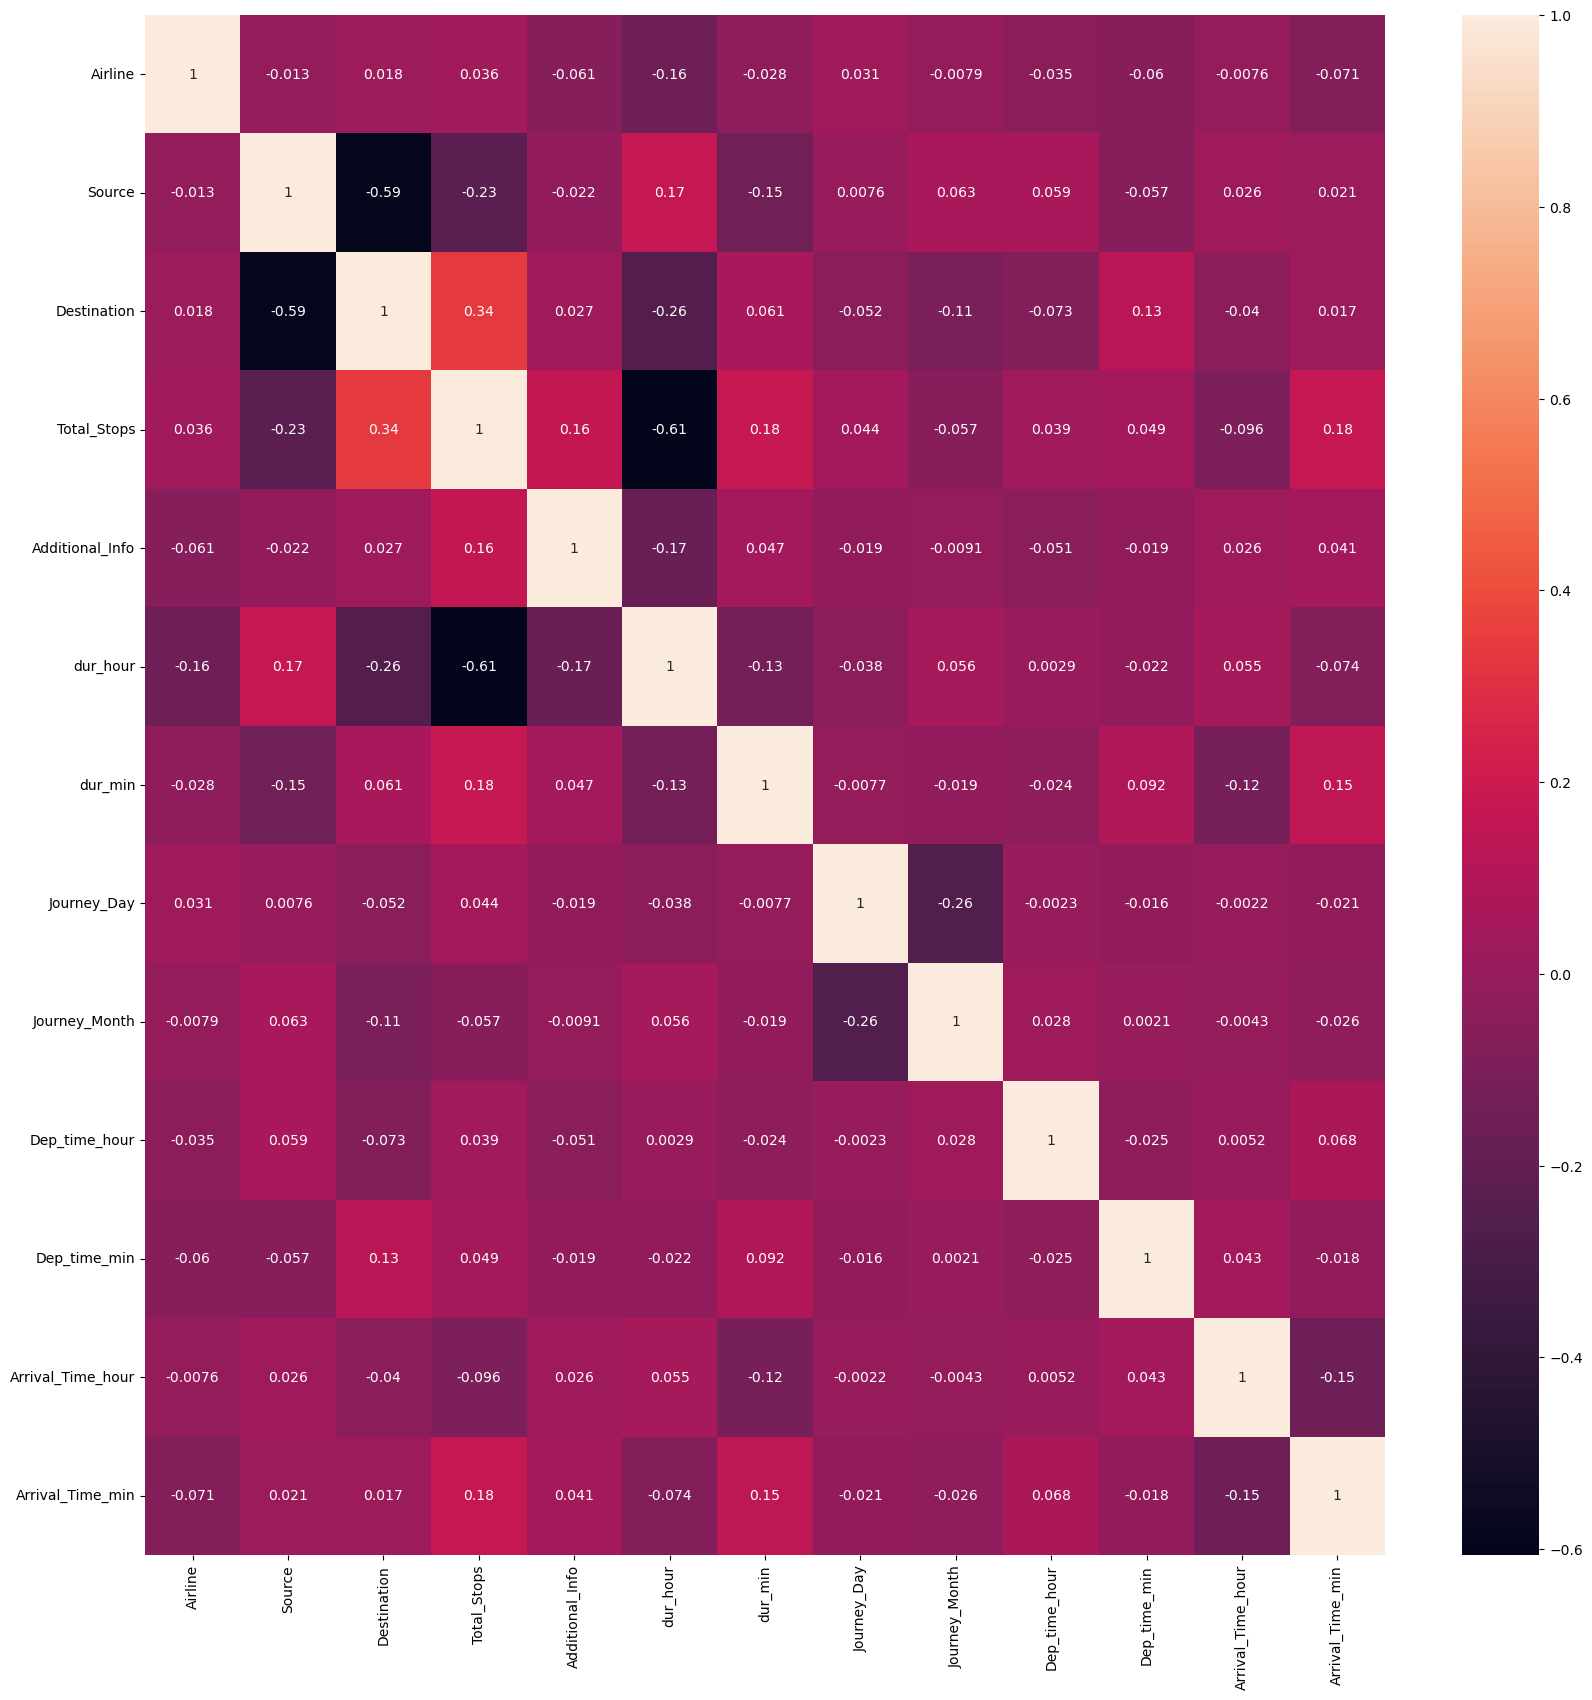

In [56]:
# check the heatmap correlation
plt.figure(figsize=(20,20))      
sns.heatmap(data1.corr(),annot=True)  

## Model Creation

In [57]:
# Model creation independent variable and dependent variable.
x=data1
y=data.Price

In [58]:
x               # Independent variable

,Airline,Source,Destination,Total_Stops,Additional_Info,dur_hour,dur_min,Journey_Day,Journey_Month,Dep_time_hour,Dep_time_min,Arrival_Time_hour,Arrival_Time_min
0,-0.410805,-1.658359,2.416534,1.407210,0.499921,-0.970614,1.279041,1.285536,-0.848450,1.654154,-0.234950,-1.800436,-0.890014
1,-1.261152,0.890014,-0.973812,-0.253703,0.499921,-0.381999,-0.196319,-0.872724,-1.517909,-1.303113,1.363607,-0.050909,-0.587094
2,0.014369,0.040556,-0.295743,-0.253703,0.499921,1.030677,-1.671678,-0.759131,1.159928,-0.607286,0.031476,-1.363054,0.018745
3,-0.410805,0.890014,-0.973812,-0.807341,0.499921,-0.617445,-0.196319,-0.872724,2.164117,0.958326,-1.034229,1.407030,0.321664
4,-0.410805,-1.658359,2.416534,-0.807341,0.499921,-0.735168,0.983969,-1.099909,-1.517909,0.610412,1.363607,1.115442,0.624584
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,-1.686326,0.890014,-0.973812,1.407210,0.499921,-0.970614,0.098753,-0.986316,1.159928,1.132283,1.630034,1.261236,0.018745
10679,-1.261152,0.890014,-0.973812,1.407210,0.499921,-0.970614,0.393825,1.626314,-0.513720,1.306240,1.097181,1.407030,-0.284175
10680,0.014369,-1.658359,0.382326,1.407210,0.499921,-0.852891,-1.671678,1.626314,-0.513720,-0.781243,-0.234950,-0.342497,-0.284175
10681,2.565411,-1.658359,2.416534,1.407210,0.499921,-0.970614,0.688897,-1.099909,-1.517909,-0.259372,0.297903,0.094885,-0.890014


In [59]:
y               # Dependent variable 

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

## Splitting Training and Testing data

In [60]:
# Spliting the train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=30)

In [61]:
x_train.shape          # Actual dataset

(6943, 13)

In [62]:
y_train.shape           # Actual dataset

(6943,)

In [63]:
x_test.shape             # Test Prediction

(3739, 13)

In [64]:
y_test.shape              # # Test Prediction

(3739,)

## Linear Regression

In [65]:
# create Linear Regression model
from sklearn.linear_model import LinearRegression
LR=LinearRegression()   # object creation
LR.fit(x_train,y_train) # Training the model
y_predict=LR.predict(x_test)   # Test prediction

In [66]:
y_test         # actual Prediction

9982      9258
7179     13339
10461     4804
9424      7229
701       5228
         ...  
544      16092
7649      8137
9904      2754
4851      6135
6502      5678
Name: Price, Length: 3739, dtype: int64

In [67]:
y_predict    # Predicted data

array([9297.68441169, 9642.79234945, 2997.53075164, ..., 5527.10537381,
       8044.12206091, 5606.03526845])

## Model Evaluation

In [68]:
# Matrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [69]:
# r2score for testing
r2score=r2_score(y_test,y_predict)
print(" R2 score is :",r2score)

 R2 score is : 0.42486169139759056


In [70]:
# Linear Regression model Score
print('R2 score is:',r2score)
print("Mean_squared_error:",mean_squared_error(y_test,y_predict))
print("Meas_Absolute_error:",mean_absolute_error(y_test,y_predict))
print("Root_mean_squared_error:",(np.sqrt(mean_squared_error(y_test,y_predict))))

R2 score is: 0.42486169139759056
Mean_squared_error: 11140883.080507591
Meas_Absolute_error: 2516.64518730356
Root_mean_squared_error: 3337.7961412446375


In [71]:
x_test.shape

(3739, 13)

In [72]:
# Adjusted R2 score
adj_r2score=1-(1-0.41)*(2137-1)/(2137-13-1)
print('adjusted R2 score is :',adj_r2score)

adjusted R2 score is : 0.406387187941592


In [73]:
# train r2 score
y_pred_train=LR.predict(x_train)
y_pred_train

array([ 8320.2928793 , 12464.76201969,  4896.79960385, ...,
        5498.5609626 , 10104.06855951,  5048.9318427 ])

In [74]:
# r2score for training
r2score_train=r2_score(y_train,y_pred_train)
print("Training r2 score is :",r2score_train)

Training r2 score is : 0.41230652492123976


In [75]:
x_train.shape

(6943, 13)

In [76]:
#adjusted r2 score for training
adj_r2score_tra=1-(1-0.41)*(8545-1)/(8545-13-1)
print('adjusted R2 score is :',adj_r2score_tra)

adjusted R2 score is : 0.40910092603446246


# SVM algorithms

In [77]:
from sklearn.svm import SVR
sv=SVR()
sv.fit(x_train,y_train)   # Fit the training data

SVR()

In [78]:
y_pred2=sv.predict(x_test)   # Test data prediction
y_pred2

array([8304.09186586, 8442.60951735, 8022.36714527, ..., 8050.20619461,
       8113.72419633, 8096.42346383])

In [79]:
r2score_sv=r2_score(y_test,y_pred2)
print("R2 score",r2score_sv)

R2 score 0.029018322061977075


In [80]:
# SVM model score
print('R2 score is:',r2score_sv)
print("Mean_squared_error:",mean_squared_error(y_test,y_pred2))
print("Meas_Absolute_error:",mean_absolute_error(y_test,y_pred2))
print("Root_mean_squared_error:",(np.sqrt(mean_squared_error(y_test,y_pred2))))

R2 score is: 0.029018322061977075
Mean_squared_error: 18808681.643045872
Meas_Absolute_error: 3445.7559412685882
Root_mean_squared_error: 4336.897698014777


In [81]:
x_test.shape                # test data

(3739, 13)

In [82]:
# adjusted r2 score
adj_r2score_sv=1-(1-0.005)*(2137-1)/(2137-13-1)
adj_r2score_sv

-0.0010927932171456156

In [83]:
# Train data prediction
y_pred2_train=sv.predict(x_train)

In [84]:
# Train r2 score
r2score_train=r2_score(y_train,y_pred2_train)
print('Train r2 score :',r2score_train)

Train r2 score : 0.01836423917526031


## Gradient Boosting

In [85]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor() # object creation
gb.fit(x_train,y_train)   # fitting the training data

GradientBoostingRegressor()

In [86]:
# Test data prediction
y_pred1=gb.predict(x_test)
y_pred1

array([ 9961.0904224 , 13007.55758624,  4492.47337841, ...,
        2950.47415766,  7773.15622935,  6112.76398996])

In [87]:
#Testing r2 score
r2score_gb=r2_score(y_test,y_pred1)
print('R2 score is :',r2score_gb)

R2 score is : 0.8171537152314846


In [88]:
# Train data prediction
y_pred1_gb_train=gb.predict(x_train)
y_pred1_gb_train

array([10553.73416234,  8898.9031202 ,  5383.3475824 , ...,
        4489.85952968, 10510.93467135,  5850.1790582 ])

In [89]:
# Training r2 score
r2score_gb_train=r2_score(y_train,y_pred1_gb_train)
print('Training r2 score is :',r2score_gb_train)

Training r2 score is : 0.8288372994725303


In [90]:
# Gradient Boosting Regression Model score
print('R2 score is:',r2score_gb)
print("Mean_squared_error:",mean_squared_error(y_test,y_pred1))
print("Meas_Absolute_error:",mean_absolute_error(y_test,y_pred1))
print("Root_mean_squared_error:",(np.sqrt(mean_squared_error(y_test,y_pred1))))

R2 score is: 0.8171537152314846
Mean_squared_error: 3541876.883946958
Meas_Absolute_error: 1283.9563766032747
Root_mean_squared_error: 1881.9874824097417


In [91]:
x_test.shape

(3739, 13)

In [92]:
# Adjusted r2 score for test data
adj_r2score_gb=1-(1-0.80)*(2137-1)/(2137-13-1)
adj_r2score_gb

0.7987753179463024

In [93]:
x_train.shape

(6943, 13)

In [94]:
# Adjusted r2 score for training data
adj_r2score_gb_train=1-(1-0.82)*(8545-1)/(8545-13-1)
adj_r2score_gb_train

0.819725706247802

# Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
lgr.fit(x_train,y_train)

LogisticRegression()

In [96]:
y_pred_lgr=lgr.predict(x_test)
y_pred_lgr

array([10151, 14781,  4804, ...,  2227,  4482,  5678], dtype=int64)

In [97]:
r2score_lgr=r2_score(y_test,y_pred_lgr)
print(' r2 score is :',r2score_lgr)

 r2 score is : 0.46863635913061563


In [98]:
print('R2 score is:',r2score_lgr)
print("Mean_squared_error:",mean_squared_error(y_test,y_pred_lgr))
print("Meas_Absolute_error:",mean_absolute_error(y_test,y_pred_lgr))
print("Root_mean_squared_error:",(np.sqrt(mean_squared_error(y_test,y_pred_lgr))))

R2 score is: 0.46863635913061563
Mean_squared_error: 10292933.208611928
Meas_Absolute_error: 1760.8684140144424
Root_mean_squared_error: 3208.2601528884666


In [99]:
x_test.shape

(3739, 13)

In [100]:
#adjusted r2 score
adj_r2score_lgr=1-(1-0.48)*(2137-1)/(2137-13-1)
print('Adjusted r2 score is :',adj_r2score_lgr)

Adjusted r2 score is : 0.47681582666038624


In [101]:
# Train data prediction
y_pred_lgr1=lgr.predict(x_train)


In [102]:
# Train r2 score
r2score_lgr_train=r2_score(y_train,y_pred_lgr1)
print('Train r2 score :',r2score_lgr_train)

Train r2 score : 0.5682865980604788


# Decision Tree Regression

In [103]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor()
dr.fit(x_train,y_train)     # Fit the training data

DecisionTreeRegressor()

In [104]:
# Test prediction 
y_pred_dr=dr.predict(x_test)
y_pred_dr

array([ 9920., 13339.,  4804., ...,  2437.,  6477.,  5678.])

In [105]:
r2score_dr=r2_score(y_test,y_pred_dr)
print('r2 score is :',r2score_dr)

r2 score is : 0.7479690008485602


In [106]:
print('R2 score is:',r2score_dr)
print('Mean_squared_error:',(mean_squared_error(y_test,y_pred_dr)))
print('mean_absolute_error:',(mean_absolute_error(y_test,y_pred_dr)))
print("Root_Mean_squared_error:",(np.sqrt(mean_squared_error(y_test,y_pred_dr))))

R2 score is: 0.7479690008485602
Mean_squared_error: 4882039.4194099
mean_absolute_error: 825.6295578140322
Root_Mean_squared_error: 2209.5337561146016


In [107]:
x_test.shape

(3739, 13)

In [108]:
# Adjusted r2 score
adj_r2score_dr=1-(1-0.71)*(2137-1)/(2137-13-1)
print('Adjusted r2 score is :',adj_r2score_dr)

Adjusted r2 score is : 0.7082242110221384


In [109]:
# Training score
y_pred_dr_train=dr.predict(x_train)
y_pred_dr_train

array([10844.,  6612.,  4668., ...,  4823., 10844.,  7417.])

In [110]:
# Training r2 score 
r2score_dr_train=r2_score(y_train,y_pred_dr_train)
print('Training R2 score is :',r2score_dr_train)

Training R2 score is : 0.9968060591494553


## Hyperparameter Tuning with Decision tree regression

In [111]:
# using the RandomizedSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV


In [112]:

#dictionary for hyperparameters
decisiontree_grid={
                   'max_features':['auto', 'sqrt'],   #maximum number of features allowed to try in individual tree
                  'max_depth':[5,10,15],             # maximum number of levels allowed in a decision tree.   
                  'min_samples_split':[2,5,10],   #minimum number of samples required to split an internal node
                   'min_samples_leaf':[1,2,4]}    #minimum number of samples required to be at a leaf node.

In [113]:
#Create the Decision Tree Regression Model
dt_reg=DecisionTreeRegressor(random_state=42) 
# Create the gridsearchcv object
dt_cv=GridSearchCV(estimator=dt_reg, scoring='r2', param_grid=decisiontree_grid, cv=3,verbose=2)

In [114]:
# Fit the GridSearchCV object to the training data
dt_cv.fit(x_train,y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=5, max_

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2', verbose=2)

In [115]:
# Get the best parameters and best score
best_params = dt_cv.best_params_
best_score =dt_cv.best_score_
print('Best Parameters :',best_params)
print("Best Score :",best_score)


Best Parameters : {'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score : 0.8019517327606128


In [116]:
#Create the new model with the best parameter
dt_reg_best_model=DecisionTreeRegressor(max_depth= 15, max_features= 'auto', min_samples_leaf=4, min_samples_split=10)

In [117]:
# Fit the best model to the training data
dt_reg_best_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=15, max_features='auto', min_samples_leaf=4,
                      min_samples_split=10)

In [118]:
y_pred_ht=dt_reg_best_model.predict(x_test)  # Test data prediction

In [119]:
r2score_ht=r2_score(y_test,y_pred_ht)
print('Test R2 score :',r2score_ht)                    # Test data

Test R2 score : 0.8073626773466793


In [120]:
y_pred_ht1=dt_reg_best_model.predict(x_train)  # train data prediction

In [121]:
r2score_ht1=r2_score(y_train,y_pred_ht1)
print("Train R2 score",r2score_ht1)                        # Train data 

Train R2 score 0.9178303722825114


# Random Forest Regression

In [122]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100) ##object creation ,taking 100 decision tree in random forest
rfr.fit(x_train,y_train)    # training the data

RandomForestRegressor()

In [123]:
# test data prediction
y_pred_rfr=rfr.predict(x_test)

In [124]:
r2score_rfr=r2_score(y_test,y_pred_rfr)
print('Test r2 score :',r2score_rfr)       # Test data

Test r2 score : 0.8641789895969957


In [125]:
print('Test R2 score is:',r2score_rfr)
print('Mean_squared_error:',(mean_squared_error(y_test,y_pred_rfr)))
print('mean_absolute_error:',(mean_absolute_error(y_test,y_pred_rfr)))
print("Root_Mean_squared_error:",(np.sqrt(mean_squared_error(y_test,y_pred_rfr))))

Test R2 score is: 0.8641789895969957
Mean_squared_error: 2630960.195388969
mean_absolute_error: 738.4477944605765
Root_Mean_squared_error: 1622.0234879276468


In [126]:
# Train data prediction
y_pred_rfr1=rfr.predict(x_train)

In [127]:
r2score_rfr1=r2_score(y_train,y_pred_rfr1)
print('Train R2 score :',r2score_rfr1)       ##Train data

Train R2 score : 0.9792460386086439


## Hyperparameter Tuning with random forest regression

In [128]:
# using the RandomizedSearchCV for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

In [129]:
##dictionary for hyperparameters
random_grid={'n_estimators':[200,300,400,500,600],   # The numbers of the tree
            'max_depth':[5,10],                      #The mximum depth od the tree
            'min_samples_split':[2,5,10],            ##minimum number of samples required to split an internal node
            'min_samples_leaf':[1,2,4],              #minimum number of samples required to be at a leaf node. 
            'max_features':['auto','sqrt']}          ##maximum number of features allowed to try in individual tree

In [130]:
# #Create the random forest Regression Model
random_reg=RandomForestRegressor()
## Create the gridsearchcv object
random_cv=RandomizedSearchCV(estimator=random_reg,
                             param_distributions=random_grid,
                            scoring='r2',
                            cv=3,
                            random_state=40,
                            n_iter=10)

In [131]:
# fit the RandomizedSearchCV object to training data
random_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 300, 400, 500,
                                                         600]},
                   random_state=40, scoring='r2')

In [132]:
# get the best parameters 
rfr_best_params=random_cv.best_params_
print('Best Paraameter :',rfr_best_params)

Best Paraameter : {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10}


In [133]:
# create the new model with the best parameter
random_reg_best_model=RandomForestRegressor(n_estimators=300,min_samples_split=2, min_samples_leaf=4, max_features='auto', max_depth=10)

In [134]:
# Fit the best model to the training data
random_reg_best_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, n_estimators=300)

In [135]:
y_pred_rfr_ht=random_reg_best_model.predict(x_test)  # Test data

In [136]:
r2score_rfr_ht=r2_score(y_test,y_pred_rfr_ht)
print('Test r2 score :',r2score_rfr_ht)

Test r2 score : 0.8530278332981994


In [137]:
y_pred_rfr_ht1=random_reg_best_model.predict(x_train)  # Train data

In [138]:
r2score_rfr_ht1=r2_score(y_train,y_pred_rfr_ht1)
print('Train r2 score :',r2score_rfr_ht1)

Train r2 score : 0.8916354970226082


## Create the Dataframe model score

In [139]:
# Create the list of Dictionary 
new_data=[['LinearRegression',0.4248,0.4123],['SVR',0.0290,0.01836],['GradientBoostingRegressor',0.8182,0.8288],['LogisticRegression',0.4686, 0.5682],['DecisionTreeRegression',0.7692,0.9968,0.8051,0.9178],['randomForestRegression',0.8686,0.9784,0.8544,0.8921]]

In [140]:
new_data  # Excute the elements

[['LinearRegression', 0.4248, 0.4123],
 ['SVR', 0.029, 0.01836],
 ['GradientBoostingRegressor', 0.8182, 0.8288],
 ['LogisticRegression', 0.4686, 0.5682],
 ['DecisionTreeRegression', 0.7692, 0.9968, 0.8051, 0.9178],
 ['randomForestRegression', 0.8686, 0.9784, 0.8544, 0.8921]]

In [141]:
# Create the dataframe using Pd.datafram
frame_data=pd.DataFrame(new_data,columns=['Model','R2_Score','Train_R2_score','R2_Score_Hyper_Tuning','Train_R2_score_hyper_tuning'])

In [142]:
frame_data     # Excute the frame with model score.

,Model,R2_Score,Train_R2_score,R2_Score_Hyper_Tuning,Train_R2_score_hyper_tuning
0,LinearRegression,0.4248,0.41230,NaN,NaN
1,SVR,0.0290,0.01836,NaN,NaN
2,GradientBoostingRegressor,0.8182,0.82880,NaN,NaN
3,LogisticRegression,0.4686,0.56820,NaN,NaN
4,DecisionTreeRegression,0.7692,0.99680,0.8051,0.9178
5,randomForestRegression,0.8686,0.97840,0.8544,0.8921


## Data Analysis report 
##### In this dataset,We are trying to analysis travel dataset and extract the insight.This will help us to understand the travel behavior.

### Univariate Analysis features Explaination

### Bivariate Analysis features Explaination

### Data Preprocessing and feature Engineering Explaination

### Feature Selection

### Model Creation

### LinearRegression:

### SVR:

### LogistictRegression :

### GradientBoostingRegression:

### DecisionTreeRegression:

### RandomForestRegression:

In [143]:
frame_data 

,Model,R2_Score,Train_R2_score,R2_Score_Hyper_Tuning,Train_R2_score_hyper_tuning
0,LinearRegression,0.4248,0.41230,NaN,NaN
1,SVR,0.0290,0.01836,NaN,NaN
2,GradientBoostingRegressor,0.8182,0.82880,NaN,NaN
3,LogisticRegression,0.4686,0.56820,NaN,NaN
4,DecisionTreeRegression,0.7692,0.99680,0.8051,0.9178
5,randomForestRegression,0.8686,0.97840,0.8544,0.8921


## Best Model For the Flight Price Prediction

#### I have seen all the model r2 score ,where Random Forest Regression is giving us best model performance accuracy score 86.86%. So i will consider this model will be good for future flight price prediction.